# OCR testing



***Frank Xu, Sept 24***

#### Purpose: Testing OCR on the given test pictures. Major OCR tools here are Tesseract and AWS Rekognition.

### Data loading
4 Test images are stored in my github for easier read-in process

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import base64
import pytesseract
from io import BytesIO
import requests

# Utility function to convert Image to Base64 
def im_2_b64(image):
    buff = BytesIO()
    image = image.convert("RGB")
    image.save(buff, format="jpeg")
    img_str = base64.b64encode(buff.getvalue())
    return img_str

In [2]:
url = ["https://raw.githubusercontent.com/franknb/dropbox/master/test_images/img1.png",
       "https://raw.githubusercontent.com/franknb/dropbox/master/test_images/img2.png",
       "https://raw.githubusercontent.com/franknb/dropbox/master/test_images/img3.png",
       "https://raw.githubusercontent.com/franknb/dropbox/master/test_images/img4.png"]
im1 = Image.open(requests.get(url[0], stream=True).raw)
im2 = Image.open(requests.get(url[1], stream=True).raw)
im3 = Image.open(requests.get(url[2], stream=True).raw)
im4 = Image.open(requests.get(url[3], stream=True).raw)

### Testing on image 1

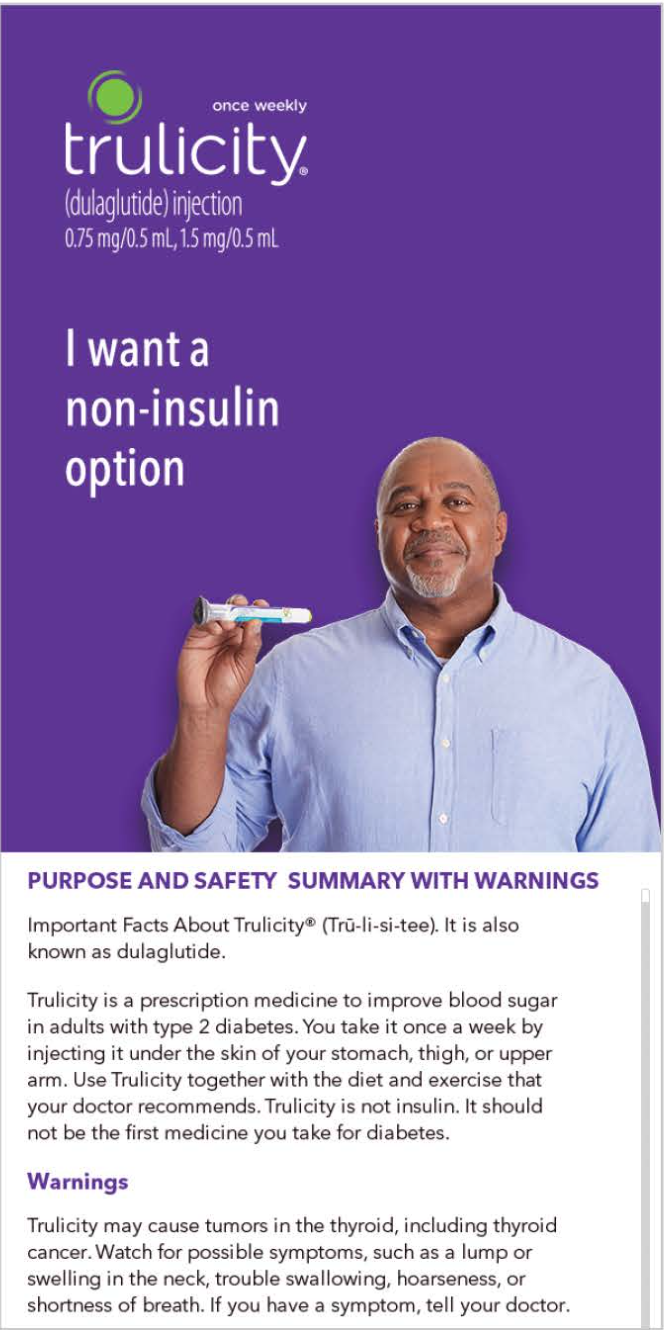

In [3]:
im1

### Tesseract

In [4]:
print(pytesseract.image_to_string(im1))

   

Cent

trulicily.
(dulaglutide) injection
TTT ORT COSTE

A Elie
non-insulin
option

   

PURPOSE AND SAFETY SUMMARY WITH WARNINGS

Important Facts About Trulicity® (Trd-li-si-tee). It is also
known as dulaglutide.

Trulicity is a prescription medicine to improve blood sugar
in adults with type 2 diabetes. You take it once a week by
injecting it under the skin of your stomach, thigh, or upper
arm. Use Trulicity together with the diet and exercise that
your doctor recommends. Trulicity is not insulin. It should
not be the first medicine you take for diabetes.

Warnings

Trulicity may cause tumors in the thyroid, including thyroid
cancer. Watch for possible symptoms, such as a lump or
swelling in the neck, trouble swallowing, hoarseness, or
shortness of breath. If you have a symptom, tell your doctor.



In [5]:
# Boxes information
# print(pytesseract.image_to_boxes(im1))

### AWS Rekognition

This part will require installing AWS CLI tools and setup access keys.

In [6]:
import boto3
client=boto3.client('rekognition')
response=client.detect_text(Image={'Bytes':requests.get(url[0], stream=True).content})

In [7]:
for text in response['TextDetections']:
    print (text['DetectedText'])

once weekly
trulicity.
(dulaglutide) injection
0.75 mg/0.5mL, 1.5 mg/0.5mL
I want a
non-insulin
option
PURPOSE AND SAFETY SUMMARY WITH WARNINGS
Important Facts About Trulicity (Tru-li-si-tee). It is also
known as dulaglutide.
Trulicity is a prescription medicine to improve blood sugar
in adults with type 2 diabetes. You take it once a week by
once
weekly
trulicity.
(dulaglutide) injection
0.75 mg/0.5mL,
1.5 mg/0.5mL
I
want
a
non-insulin
option
PURPOSE
AND
SAFETY
SUMMARY
WITH
WARNINGS
Important
Facts
About
Trulicity
(Tru-li-si-tee).
It
is
also
known
as
dulaglutide.
Trulicity
is
a
prescription
medicine
to
improve
blood
sugar
in
adults
with
type
2
diabetes.
You
take
it
once
a
week
by


# Conclusion

#### Clearly, AWS Rekognition achieves a much higher accuracy here. However, with a free base-tier AWS account, I can only get limited text from each image. According to AWS, the pricing of Rekognition is equal or less than $0.001 per image.

#### Tesseract works just not as well as Rekognition, but it's free.

#### Both methods provide boxes, Tesseract provides boxes to each letter while Rekognition provides boxes to each word. Functional-wise, Tesseract limits to OCR only, while Rekognition brings object detection/labeling, face analysis, etc.